In [1]:
import tensorflow as tf
import tensorflow.keras.datasets as datasets
import matplotlib.pyplot as plt
print(tf.__version__)

# 加载数据
def load_data():
    # 利用tf自带的数据来加载MNIST
    (x, y),(x_val,y_val)= datasets.mnist.load_data()
    print(x.shape)
    print(y.shape)

    # 将数据转换成tensor
    x = tf.convert_to_tensor(x,dtype=tf.float32)
    y = tf.convert_to_tensor(y,dtype=tf.int32)

    # # 查看数据的最大值与最小值
    # print(tf.reduce_max(x),tf.reduce_min(x))
    # print(tf.reduce_min(y),tf.reduce_max(y))

    # 归一化
    x = x/255.
    # one-hot
    y = tf.one_hot(y,depth=10)

    # 将x的数据转换成[b,28*28] 方便进行处理
    x = tf.reshape(x,(-1,28*28))
    # 利用tf.data构建数据集对象
    train_dataset = tf.data.Dataset.from_tensor_slices((x,y))
    # 设置批量的训练batch_size
    train_dataset = train_dataset.batch(200)
    return train_dataset



2.3.0


In [6]:
def init_parameters():
    # 每层的张量都需要被优化，故使用 Variable 类型，并使用截断的正太分布初始化权值张量
    # 偏置向量初始化为 0 即可
    # 第一层的参数
    w1 = tf.Variable(tf.random.truncated_normal([784,256],stddev=0.1))
    b1 = tf.Variable(tf.zeros([256]))
    # 第二层的参数
    w2 = tf.Variable(tf.random.truncated_normal([256,128],stddev=0.1))
    b2 = tf.Variable(tf.zeros([128]))
    # 第三层的参数
    w3 = tf.Variable(tf.random.truncated_normal([128,10],stddev=0.1))
    b3 = tf.Variable(tf.zeros([10]))
    return w1,b1,w2,b2,w3,b3


In [3]:
def train_epoch(epoch,train_dataset,w1,b1,w2,b2,w3,b3,lr=0.001):
    for step,(x,y) in enumerate(train_dataset): # 训练每一个batch
        with tf.GradientTape() as tape:
            # 正向传播计算预测值
            h1 = x @ w1 + b1
            h1 = tf.nn.relu(h1)
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)
            out = h2 @ w3 + b3
            # 计算模型的预测值与标签之间的均方差
            loss = tf.square(y-out)
            loss = tf.reduce_mean(loss)
            # 计算梯度值
            grads = tape.gradient(loss,[w1,b1,w2,b2,w3,b3])

        # 梯度更新， assign_sub 将当前值减去参数值，原地更新
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])
        
        # 每次取到100个批次就打印信息
        if step % 100 == 0:
            print(epoch,step,"loss: ",loss.numpy())


In [9]:
def train(epochs):
    losses = []
    train_dataset = load_data()
    w1,b1,w2,b2,w3,b3 = init_parameters()
    for epoch in range(epochs):
        loss = train_epoch(epoch,train_dataset,w1,b1,w2,b2,w3,b3,lr=0.001)
        losses.append(loss)
    x = [i for i in range(0,epochs)]
    # 绘制loss值曲线
    plt.plot(x,losses,color='blue',marker='s',label='train')
    plt.xlabel('epoch')
    plt.ylabel('mes')
    plt.legend()
    plt.show()


(60000, 28, 28)
(60000,)
0 0 loss:  0.31815022
0 100 loss:  0.20852256
0 200 loss:  0.18039483
1 0 loss:  0.15518986
1 100 loss:  0.16161835
1 200 loss:  0.15412518
2 0 loss:  0.13620299
2 100 loss:  0.14595641
2 200 loss:  0.13895412
3 0 loss:  0.123798996
3 100 loss:  0.13482101
3 200 loss:  0.127905
4 0 loss:  0.11457663
4 100 loss:  0.12643804
4 200 loss:  0.119483426


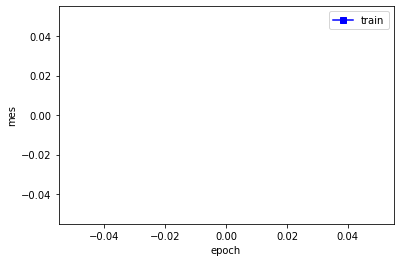

In [10]:
train(20)